In [139]:
# Background: A rewards programme try to have a better targeting via offering products or needs that better suit her customers need. Having said that, they have identified via calculation of customer lifetime value - a group of high value customers. Certainly, they have certain characteristics which is yet unknown to the programme. To this end, the essence of the exercise is to identify some more clue about how to find out the top 5% customer group based on some known data so that the programme can start nuturing them as soon as it could

In [1]:
# %load utils/imports.py
%matplotlib inline
import numpy as np
import pandas as pd

from utils import *
#from utils.styles import *

# %load utils/plotting.py
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf

init_notebook_mode()
cf.go_offline()
import re

In [2]:
df = pd.read_csv('data/Member_Database.csv') # member profile data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7648
Data columns (total 81 columns):
PanelistIdQuestion                                     7649 non-null int64
Speak_English                                          7649 non-null int64
Speak_Cantonese                                        7649 non-null int64
Speak_Putonghua                                        7649 non-null int64
Hobbies_Arts_Festival                                  7649 non-null int64
Hobbies_Music_Concert                                  7649 non-null int64
Hobbies_Outdoor_Activities                             7649 non-null int64
Hobbies_Ball_Games                                     7649 non-null int64
Hobbies_Indoor_Sports                                  7649 non-null int64
Hobbies_Sports_Events                                  7649 non-null int64
Hobbies_Driving                                        7649 non-null int64
Hobbies_Adventures                                     7649 non-null

In [4]:
df.describe()

PanelistIdQuestion  Speak_English  Speak_Cantonese  Speak_Putonghua  \
count         7649.000000    7649.000000      7649.000000      7649.000000   
mean        250581.588181       0.320826         0.830697         0.062884   
std         118587.484583       0.466825         0.375044         0.242770   
min             19.000000       0.000000         0.000000         0.000000   
25%         211866.000000       0.000000         1.000000         0.000000   
50%         314220.000000       0.000000         1.000000         0.000000   
75%         318179.000000       1.000000         1.000000         0.000000   
max         344946.000000       1.000000         1.000000         1.000000   

       Hobbies_Arts_Festival  Hobbies_Music_Concert  \
count            7649.000000            7649.000000   
mean                0.277683               0.426069   
std                 0.447886               0.494536   
min                 0.000000               0.000000   
25%                 0.000000               0.000000   
50%                 0.000000               0.000000   
75%                 1.000000               1.000000   
max                 1.000000               1.000000   

       Hobbies_Outdoor_Activities  Hobbies_Ball_Games  Hobbies_Indoor_Sports  \
count                 7649.000000         7649.000000             7649.00000   
mean                     0.297294            0.244607                0.31795   
std                      0.457097            0.429882                0.46571   
min                      0.000000            0.000000                0.00000   
25%                      0.000000            0.000000                0.00000   
50%                      0.000000            0.000000                0.00000   
75%                      1.000000            0.000000                1.00000   
max                      1.000000            1.000000                1.00000   

       Hobbies_Sports_Events         ...          Follow_None   No_of_Card  \
count            7649.000000         ...          7649.000000  7649.000000   
mean                0.184730         ...             0.564910     5.971761   
std                 0.388104         ...             0.495801     3.685213   
min                 0.000000         ...             0.000000     0.000000   
25%                 0.000000         ...             0.000000     3.000000   
50%                 0.000000         ...             1.000000     5.000000   
75%                 0.000000         ...             1.000000     8.000000   
max                 1.000000         ...             1.000000    36.000000   

        Age_Import  Direct_Earn_Card_AMEXCXCard  Direct_Earn_Card_STCBAMLCard  \
count  7649.000000                  7649.000000                   7649.000000   
mean     40.848608                     0.719571                      0.265002   
std      10.550106                     0.449238                      0.441363   
min      18.000000                     0.000000                      0.000000   
25%      33.000000                     0.000000                      0.000000   
50%      39.000000                     1.000000                      0.000000   
75%      48.000000                     1.000000                      1.000000   
max      86.000000                     1.000000                      1.000000   

        Tenure_AML  TRANX_ACRL_AIR_P1Y  TRANX_ACRL_NAIR_P1Y  \
count  7649.000000         7649.000000          7649.000000   
mean      8.751602            4.687933            17.153092   
std       5.257094           10.073475            16.997107   
min       0.000000            0.000000             0.000000   
25%       4.000000            0.000000             5.000000   
50%       8.000000            2.000000            14.000000   
75%      14.000000            4.000000            25.000000   
max      17.000000          106.000000           397.000000   

       TRANX_RED_AIR_P1Y  TRANX_RED_NAIR_P1Y  
count        7649.000000         7649.0

In [5]:
df.head()

PanelistIdQuestion  Speak_English  Speak_Cantonese  Speak_Putonghua  \
0                  19              0                1                0   
1                  36              0                1                0   
2                  42              0                1                0   
3                  50              1                0                0   
4                  52              0                1                0   

   Hobbies_Arts_Festival  Hobbies_Music_Concert  Hobbies_Outdoor_Activities  \
0                      0                      1                           0   
1                      1                      0                           0   
2                      1                      0                           1   
3                      0                      1                           1   
4                      1                      1                           1   

   Hobbies_Ball_Games  Hobbies_Indoor_Sports  Hobbies_Sports_Events  \
0                   0                      1                      0   
1                   0                      1                      0   
2                   0                      0                      0   
3                   0                      1                      0   
4                   1                      1                      0   

               ...                TRANX_RED_NAIR_P1Y          Accrual_P12M  \
0              ...                                 0     Non air earn only   
1              ...                                 1     Non air earn only   
2              ...                                 0  Air and non-air earn   
3              ...                                 0  Air and non-air earn   
4              ...                                 0  Air and non-air earn   

           Redemption_P12M  Air_Accrual_P12M  Non_Air_Accrual_P12M  \
0   Did not redeem in P12M                No                   Yes   
1  Non air redemption only                No                   Yes   
2   Did not redeem in P12M               Yes                   Yes   
3   Did not redeem in P12M               Yes                   Yes   
4   Did not redeem in P12M               Yes                   Yes   

   Air_Redemption_P12M  Non_Air_Redemption_P12M  At_Risk_MPO_Green  \
0                   No                       No        Not at risk   
1                   No                      Yes        Not at risk   
2                   No                       No        Not at risk   
3                   No                       No        Not at risk   
4                   No                       No        Not at risk   

        Download_AML_App                 F_USD1_Renewal  
0       Yes - downloaded  Have never used USD1 to renew  
1  No - not yet download  Have never used USD1 to renew  
2       Yes - downloaded  Have never used USD1 to renew  
3  No - not yet download  Have never used USD1 to renew  
4       Yes - downloaded  Have never used USD1 to renew  

[5 rows x 81 columns]

# EDA

In [6]:
def top5(t):
    if t == 'Top 5 percent':
        t = 1
    else:
        t = 0
    return t
    
df['Top5percent_code'] = df.Top5percent.apply(top5)

In [7]:
# Speak English is obviously more likely to be top 5 percent
df.groupby(['Speak_English','Top5percent']).count().max(1).unstack().div(df.groupby(['Speak_English']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [8]:
# Non Cantones Speaking is more likely to be top 5 percent
df.groupby(['Speak_Cantonese','Top5percent']).count().max(1).unstack().div(df.groupby(['Speak_Cantonese']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [9]:
# No difference for Putonghua speaking
df.groupby(['Speak_Putonghua','Top5percent']).count().max(1).unstack().div(df.groupby(['Speak_Putonghua']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [10]:
# No obvious difference for hobbies in Arts Festival
df.groupby(['Hobbies_Arts_Festival','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Arts_Festival']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [11]:
# No difference for music concerts
df.groupby(['Hobbies_Music_Concert','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Music_Concert']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [12]:
# No difference for outdoor activities
df.groupby(['Hobbies_Outdoor_Activities','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Outdoor_Activities']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [13]:
# No difference for ball games
df.groupby(['Hobbies_Ball_Games','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Ball_Games']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [14]:
# No difference across hobbies as indoor sports
df.groupby(['Hobbies_Indoor_Sports','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Indoor_Sports']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [15]:
# Slight difference among those whose hobbies is watching sports events
df.groupby(['Hobbies_Sports_Events','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Sports_Events']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [16]:
# Driving lovers are more likely to be top 5 percent
df.groupby(['Hobbies_Driving','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Driving']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [17]:
# No signficant difference
df.groupby(['Hobbies_Adventures','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Adventures']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [18]:
# No difference
df.groupby(['Hobbies_Movies','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Movies']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [19]:
# No significant difference
df.groupby(['Hobbies_Drama','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Drama']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [20]:
# Online game lovers are less likely to be top 5 percent
df.groupby(['Hobbies_Online_Games','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Online_Games']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [21]:
# No significant difference
df.groupby(['Hobbies_Radio','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Radio']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [22]:
# No significant difference among book lovers
df.groupby(['Hobbies_Reading','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Reading']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [23]:
# No difference among party animals
df.groupby(['Hobbies_Partying','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Partying']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [24]:
# No difference among those who play musical instrument
df.groupby(['Hobbies_Playing_Musical_Instrument','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Playing_Musical_Instrument']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [25]:
# No difference among those who love joining hobby class
df.groupby(['Hobbies_Hobby_Class','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Hobby_Class']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [26]:
# No difference among those who love photography
df.groupby(['Hobbies_Photography','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Photography']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [27]:
# Those who love spa is more likely to be top 5 percent
df.groupby(['Hobbies_Spa','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Spa']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [28]:
# No significant difference across technology savvy members
df.groupby(['Hobbies_Technology','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Technology']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [29]:
# No significant difference among those who love shopping
df.groupby(['Hobbies_Shopping','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Shopping']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [30]:
# No significant difference across online shopping
df.groupby(['Hobbies_Online_Shopping','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Online_Shopping']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [31]:
# Travel lovers are more likely to be top 5 percent
df.groupby(['Hobbies_Travelling','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Travelling']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [32]:
# No difference among homecooking
df.groupby(['Hobbies_Homecooking','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Homecooking']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [33]:
# Those who dine out are more likley to be top 5 percent
df.groupby(['Hobbies_Dining_out','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Dining_out']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [34]:
# Those who enjoy wine are more likely to be top 5 percent
df.groupby(['Hobbies_Enjoy_Wine','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Enjoy_Wine']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [35]:
# Those who love pets are less likely to be top 5 percent
df.groupby(['Hobbies_Time_Pets','Top5percent']).count().max(1).unstack().div(df.groupby(['Hobbies_Time_Pets']).count().max(1).tolist(),axis=0).iplot(kind='bar')

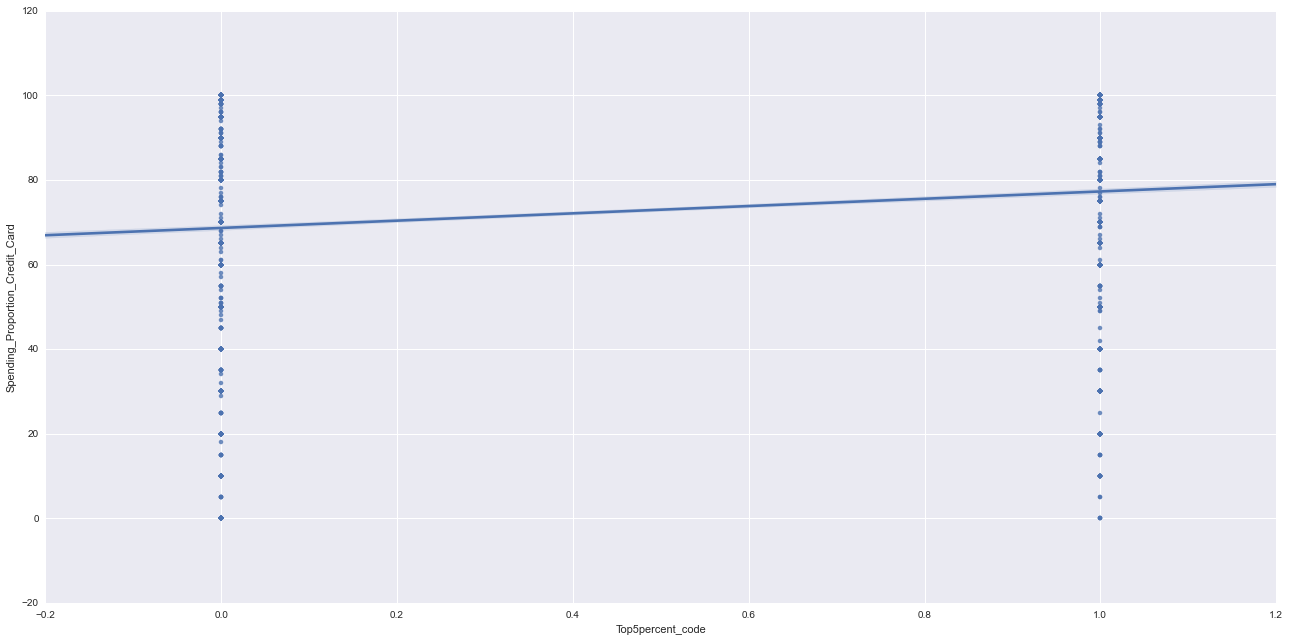

In [36]:
# Credit card spenders are more likely to be top 5 percent
sns.lmplot("Top5percent_code", "Spending_Proportion_Credit_Card", df, size=9, aspect=2)

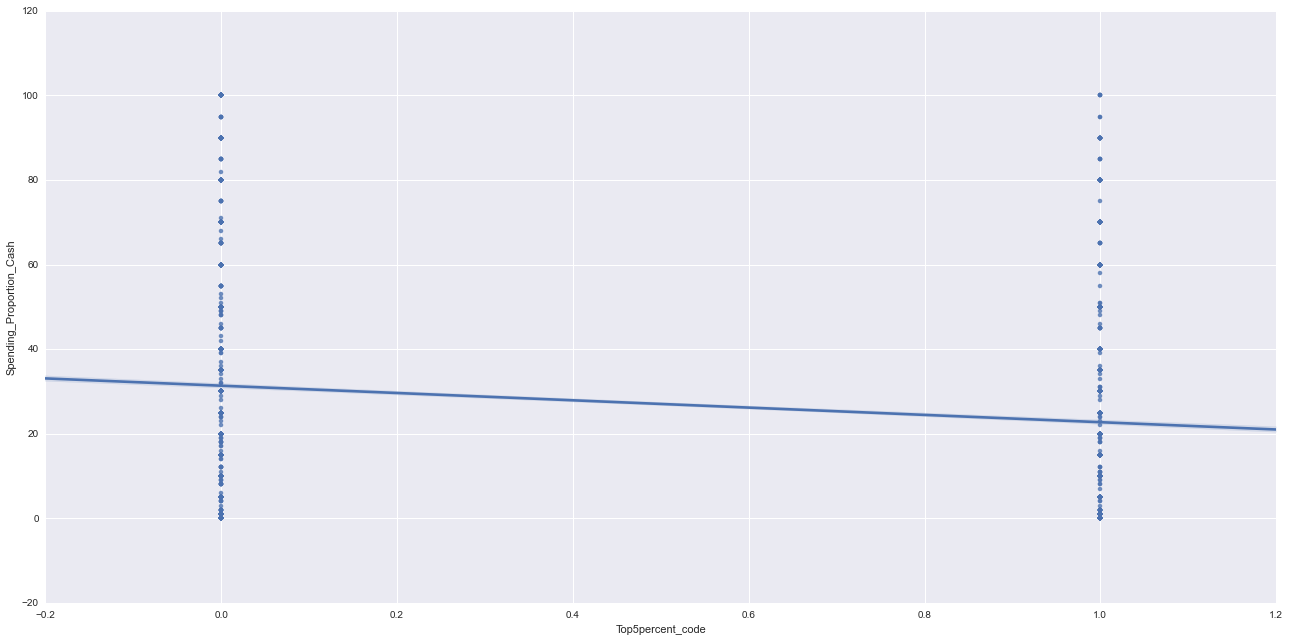

In [37]:
sns.lmplot("Top5percent_code", "Spending_Proportion_Cash", df, size=9, aspect=2)

In [38]:
# NoSigifican difference
df.groupby(['Membership_Noneoftheabove','Top5percent']).count().max(1).unstack().div(df.groupby(['Membership_Noneoftheabove']).count().max(1).tolist(),axis=0).iplot(kind='bar')

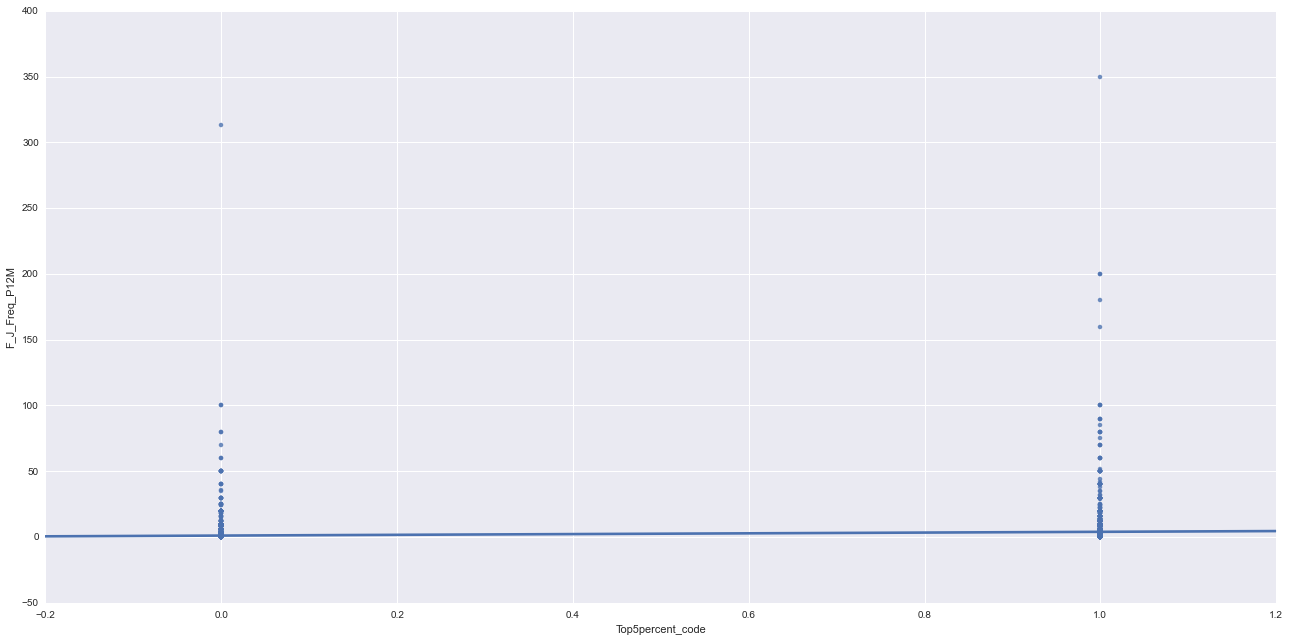

In [39]:
sns.lmplot("Top5percent_code", "F_J_Freq_P12M", df, size=9, aspect=2)
# no difference among those with frequency of taking first or business class

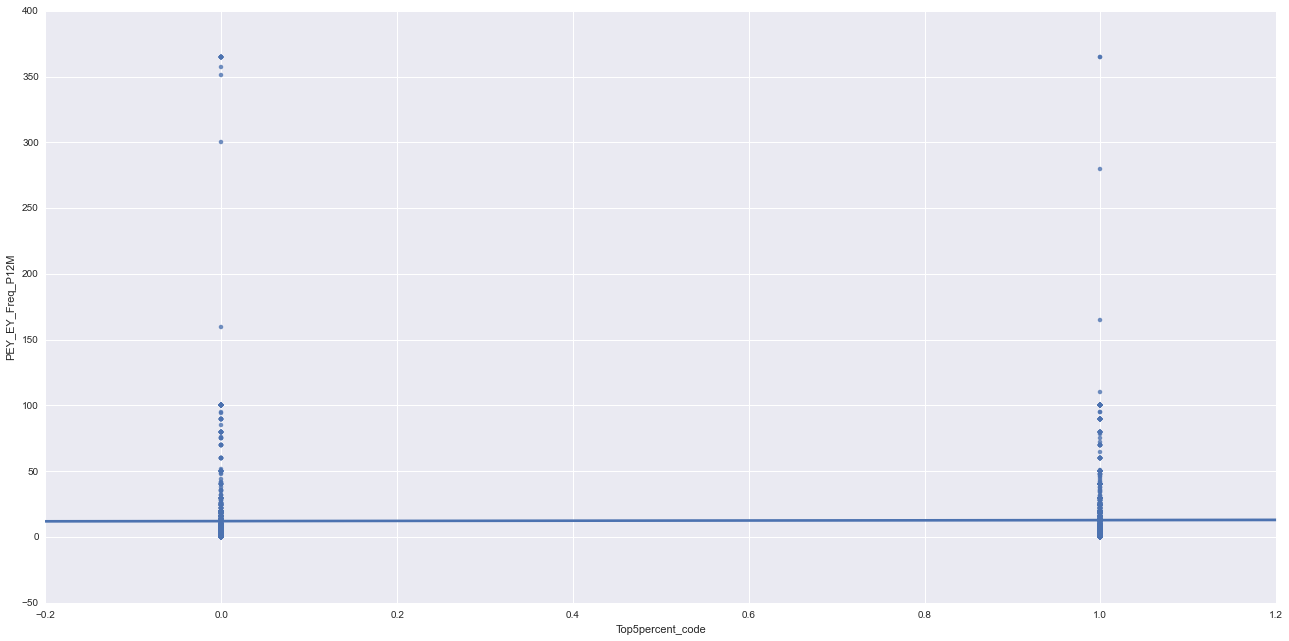

In [40]:
sns.lmplot("Top5percent_code", "PEY_EY_Freq_P12M", df, size=9, aspect=2)
# no difference across frequency of taking PEY or EY class in P12M

In [41]:
# Holders of at least 1 FFP is more likely to be top 5 percent
df.groupby(['FFP_Imnotamemberofanyfrequentflyerclubsorprogrammes','Top5percent']).count().max(1).unstack().div(df.groupby(['FFP_Imnotamemberofanyfrequentflyerclubsorprogrammes']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [42]:
# Single is a bit more skewed to be top 5 percent
df.groupby(['Martial_Status','Top5percent']).count().max(1).unstack().div(df.groupby(['Martial_Status']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [43]:
df.groupby(['HH_Member','Top5percent']).count().max(1).unstack().div(df.groupby(['HH_Member']).count().max(1).tolist(),axis=0)
# more HH member skew to less likely to be top 5 percent

Top5percent               Non top 5 percent  Top 5 percent
HH_Member                                                 
2                                  0.580361       0.419639
3                                  0.628172       0.371828
4 � 5                              0.625527       0.374473
6 � 7                              0.612903       0.387097
8 or more                          1.000000            NaN
I prefer not to disclose           0.637860       0.362140
Only myself                        0.519663       0.480337

In [44]:
# With kids under 12 is not significant
df.groupby(['Children_Under12','Top5percent']).count().max(1).unstack().div(df.groupby(['Children_Under12']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [45]:
# With teenager kids are more likely to be top 5 percent
df.groupby(['Children_12_17','Top5percent']).count().max(1).unstack().div(df.groupby(['Children_12_17']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [46]:
# With kids 18_ are even more likle to be top 5 percent
df.groupby(['Chilrdren_18_or_above','Top5percent']).count().max(1).unstack().div(df.groupby(['Chilrdren_18_or_above']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [47]:
# With no children is less likely to be top 5 percent
df.groupby(['Children_None','Top5percent']).count().max(1).unstack().div(df.groupby(['Children_None']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [48]:
# no obvious difference
df.groupby(['Working_Status','Top5percent']).count().max(1).unstack().div(df.groupby(['Working_Status']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [49]:
df.groupby(['Occupation','Top5percent']).count().max(1).unstack().div(df.groupby(['Occupation']).count().max(1).tolist(),axis=0)
# higher management and SME business ower are more likely top be top 5 percent

Top5percent                                         Non top 5 percent  \
Occupation                                                              
Higher management, senior admin, senior profess...           0.459899   
Junior to midlevel white collar (manager, profe...           0.649601   
Large business owner (with 50 or more employees)             0.663507   
Manual or blue collar worker (driver, technicia...           0.789199   
Not working                                                  0.567870   
Others                                                       0.682692   
Self-employed / sole trader / consultant                     0.515426   
Small � medium business owner (with less than 5...           0.481356   

Top5percent                                         Top 5 percent  
Occupation                                                         
Higher management, senior admin, senior profess...       0.540101  
Junior to midlevel white collar (manager, profe...       0.350399  
Large business owner (with 50 or more employees)         0.336493  
Manual or blue collar worker (driver, technicia...       0.210801  
Not working                                              0.432130  
Others                                                   0.317308  
Self-employed / sole trader / consultant                 0.484574  
Small � medium business owner (with less than 5...       0.518644

In [50]:
df.groupby(['Monthly_Personal_Income','Top5percent']).count().max(1).unstack().div(df.groupby(['Monthly_Personal_Income']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# more afflucent -> more likely to be top 5 percent

In [51]:
df.groupby(['Monthly_Household_Income','Top5percent']).count().max(1).unstack().div(df.groupby(['Monthly_Household_Income']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [52]:
# no strong pattern
df.groupby(['Visit_Website_Freq','Top5percent']).count().max(1).unstack().div(df.groupby(['Visit_Website_Freq']).count().max(1).tolist(),axis=0).iplot(kind='bar')

In [53]:
df.groupby(['Follow_Facebook','Top5percent']).count().max(1).unstack().div(df.groupby(['Follow_Facebook']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# no significant difference

In [54]:
df.groupby(['Follow_Twitter','Top5percent']).count().max(1).unstack().div(df.groupby(['Follow_Twitter']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# follow twitter is more likely

In [55]:
df.groupby(['Follow_Weibo','Top5percent']).count().max(1).unstack().div(df.groupby(['Follow_Weibo']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# no signficantn difference

In [56]:
df.groupby(['Follow_WeChat','Top5percent']).count().max(1).unstack().div(df.groupby(['Follow_WeChat']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# follow wechat is more likely

In [57]:
# no strong difference among those who follow or not follow any social media
df.groupby(['Follow_None','Top5percent']).count().max(1).unstack().div(df.groupby(['Follow_None']).count().max(1).tolist(),axis=0).iplot(kind='bar')


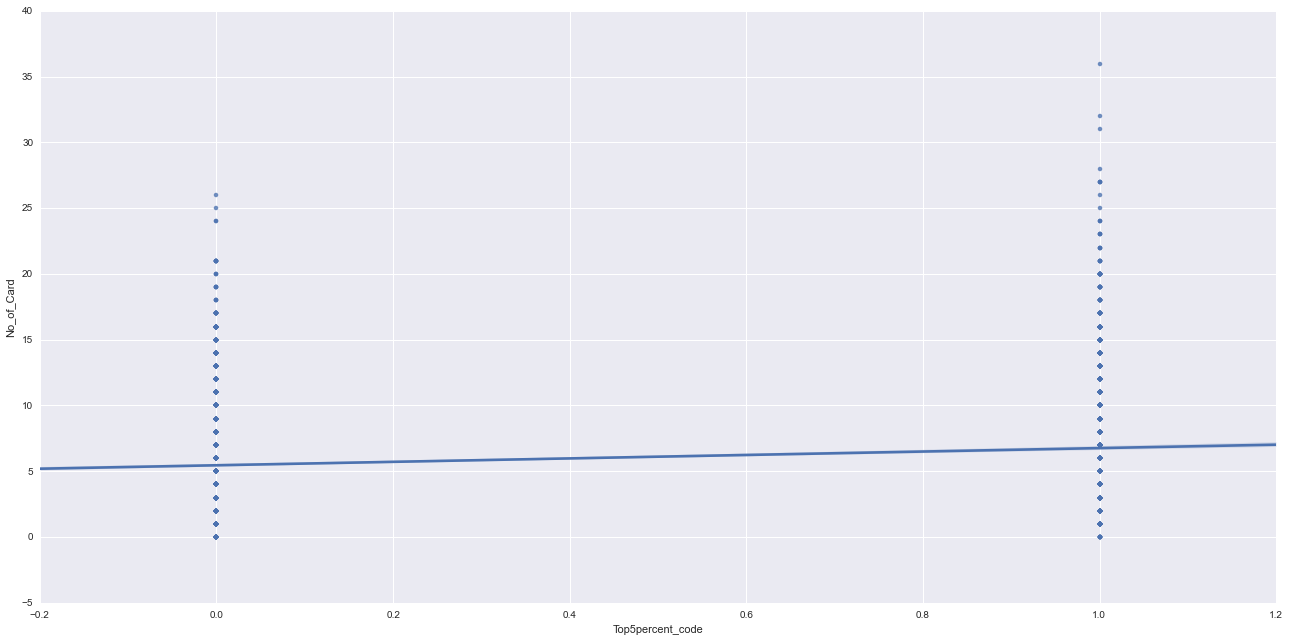

In [58]:
sns.lmplot("Top5percent_code", "No_of_Card", df, size=9, aspect=2)
# more card is a bit more likely to be top 5 percent

In [59]:
# Presence of conversion card is more likely to be top 5 percent
df.groupby(['Any_Conversion_Card','Top5percent']).count().max(1).unstack().div(df.groupby(['Any_Conversion_Card']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [60]:
# male is more likely to be top 5 percent
df.groupby(['Gender','Top5percent']).count().max(1).unstack().div(df.groupby(['Gender']).count().max(1).tolist(),axis=0).iplot(kind='bar')


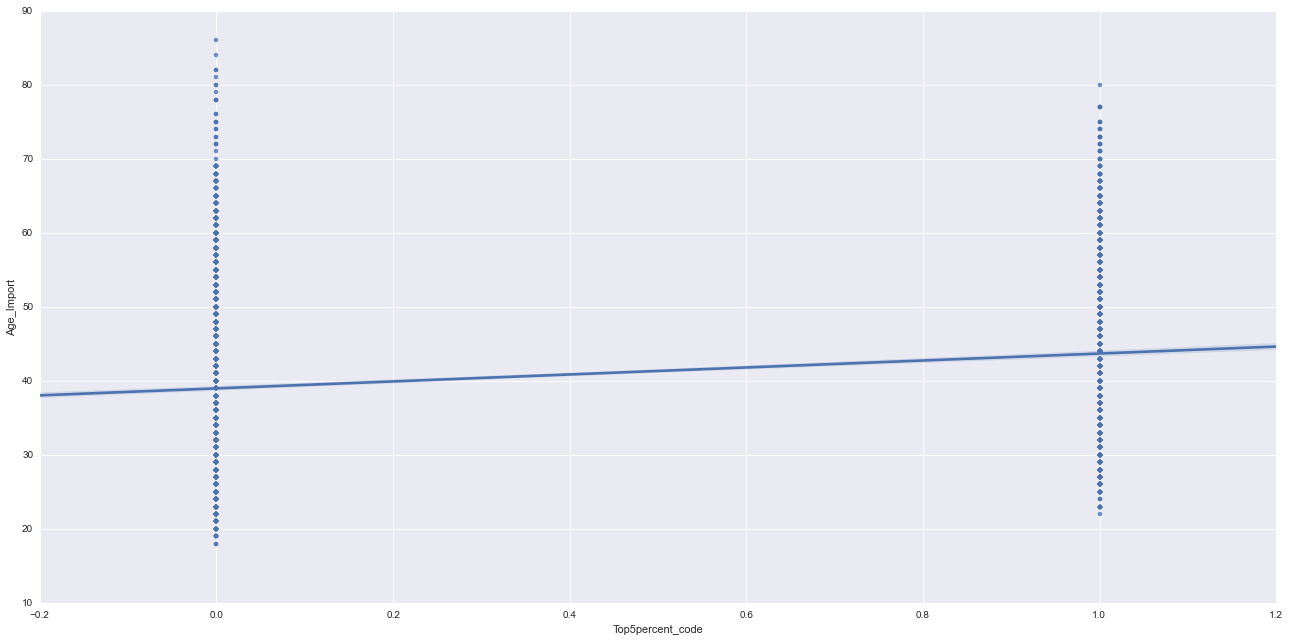

In [61]:
sns.lmplot("Top5percent_code", "Age_Import", df, size=9, aspect=2)
# more senior is more likely to be top 5 percent

In [62]:
df.groupby(['Age_Group','Top5percent']).count().max(1).unstack().div(df.groupby(['Age_Group']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# aged 41+ is more likely to be top 5 percent

In [63]:
df.groupby(['MPO_Tier','Top5percent']).count().max(1).unstack().div(df.groupby(['MPO_Tier']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# Green to Gold is most likely to be top 5 percent

In [64]:
df.groupby(['AMEX_STCB','Top5percent']).count().max(1).unstack().div(df.groupby(['AMEX_STCB']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# Presence of AMEX CX card is more likely to be top 5 percent

In [65]:
# AMEX CX Card ownership is the key - while combination with STCB AML card does not have a great increment
df.groupby(['Direct_Earn_Card_AMEXCXCard','Top5percent']).count().max(1).unstack().div(df.groupby(['Direct_Earn_Card_AMEXCXCard']).count().max(1).tolist(),axis=0).iplot(kind='bar')


In [66]:
df.groupby(['Direct_Earn_Card_STCBAMLCard','Top5percent']).count().max(1).unstack().div(df.groupby(['Direct_Earn_Card_STCBAMLCard']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# no significant differene among STCB AML cardholders

In [67]:
df.groupby(['Active_Status_P12M_P24M','Top5percent']).count().max(1).unstack().div(df.groupby(['Active_Status_P12M_P24M']).count().max(1).tolist(),axis=0).iplot(kind='bar')


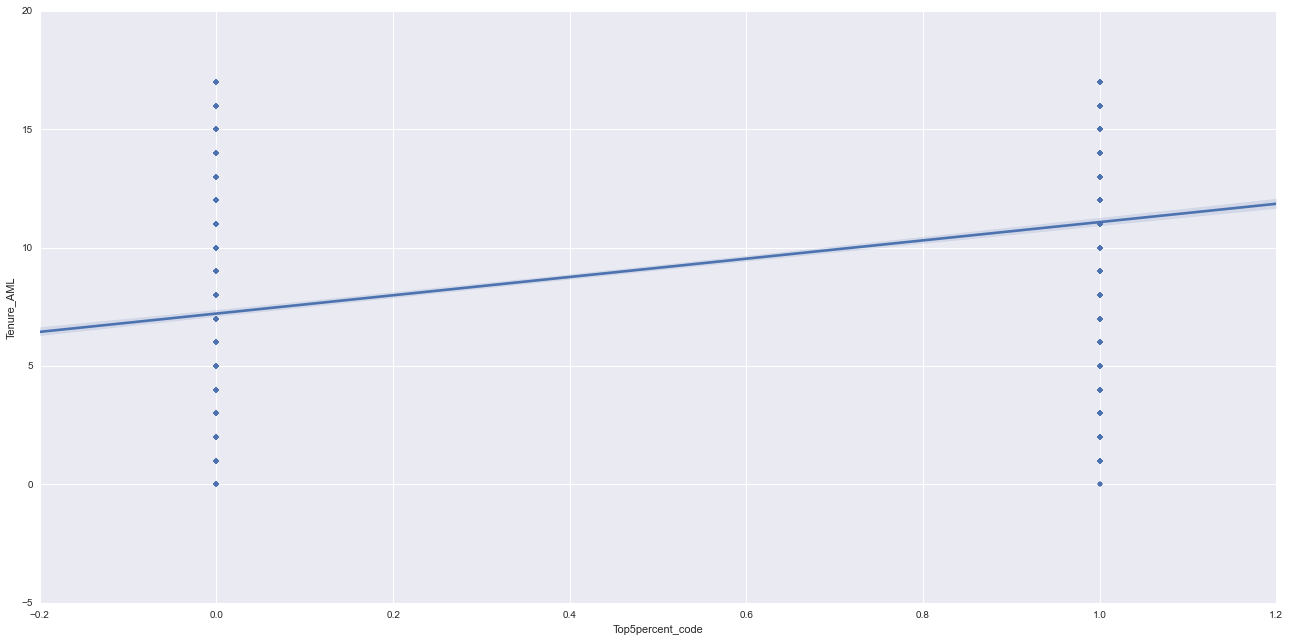

In [68]:
sns.lmplot("Top5percent_code", "Tenure_AML", df, size=9, aspect=2)
# the longer stay with AML - more likley to be top 5 percent

In [69]:
df.groupby(['Grouped_Tenure','Top5percent']).count().max(1).unstack().div(df.groupby(['Grouped_Tenure']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# 10 years+ is most likely to be top 5 percent

In [70]:
df.groupby(['P12M_Earn_Burn_Cycle','Top5percent']).count().max(1).unstack().div(df.groupby(['P12M_Earn_Burn_Cycle']).count().max(1).tolist(),axis=0)

Top5percent                                         Non top 5 percent  \
P12M_Earn_Burn_Cycle                                                    
Air Earn & Non-air Earn  + Air Redeem & Non-air...           0.208185   
Air Earn & Non-air Earn  + Air Redeem Only                   0.334513   
Air Earn & Non-air Earn  + Non-air Redeem Only               0.720430   
Air Earn + Air & Non-air Redeem                              1.000000   
Air Earn + Air Redeem Only                                   0.903226   
Air Earn + Non-air Redeem only                               0.953488   
Air Earn Only                                                0.995349   
Air Redeem Only                                              0.928571   
Earn Only � Air + Non-air                                    0.733859   
Inactive                                                     0.973684   
Non-Air Earn Only                                            0.857726   
Non-air Earn  + Non-air Redeem only                          0.846847   
Non-air Earn & Air Redeem Only                               0.499571   
Non-air Earn + Air Redeem & Non-air Redeem                   0.376569   
Non-air Redeem Only                                          1.000000   
Redeem Only � Air + Non-air                                  0.500000   

Top5percent                                         Top 5 percent  
P12M_Earn_Burn_Cycle                                               
Air Earn & Non-air Earn  + Air Redeem & Non-air...       0.791815  
Air Earn & Non-air Earn  + Air Redeem Only               0.665487  
Air Earn & Non-air Earn  + Non-air Redeem Only           0.279570  
Air Earn + Air & Non-air Redeem                               NaN  
Air Earn + Air Redeem Only                               0.096774  
Air Earn + Non-air Redeem only                           0.046512  
Air Earn Only                                            0.004651  
Air Redeem Only                                          0.071429  
Earn Only � Air + Non-air                                0.266141  
Inactive                                                 0.026316  
Non-Air Earn Only                                        0.142274  
Non-air Earn  + Non-air Redeem only                      0.153153  
Non-air Earn & Air Redeem Only                           0.500429  
Non-air Earn + Air Redeem & Non-air Redeem               0.623431  
Non-air Redeem Only                                           NaN  
Redeem Only � Air + Non-air                              0.500000

In [71]:
df.groupby(['Accrual_P12M','Top5percent']).count().max(1).unstack().div(df.groupby(['Accrual_P12M']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# air earn plus non air earn is most likely to be top 5 percent

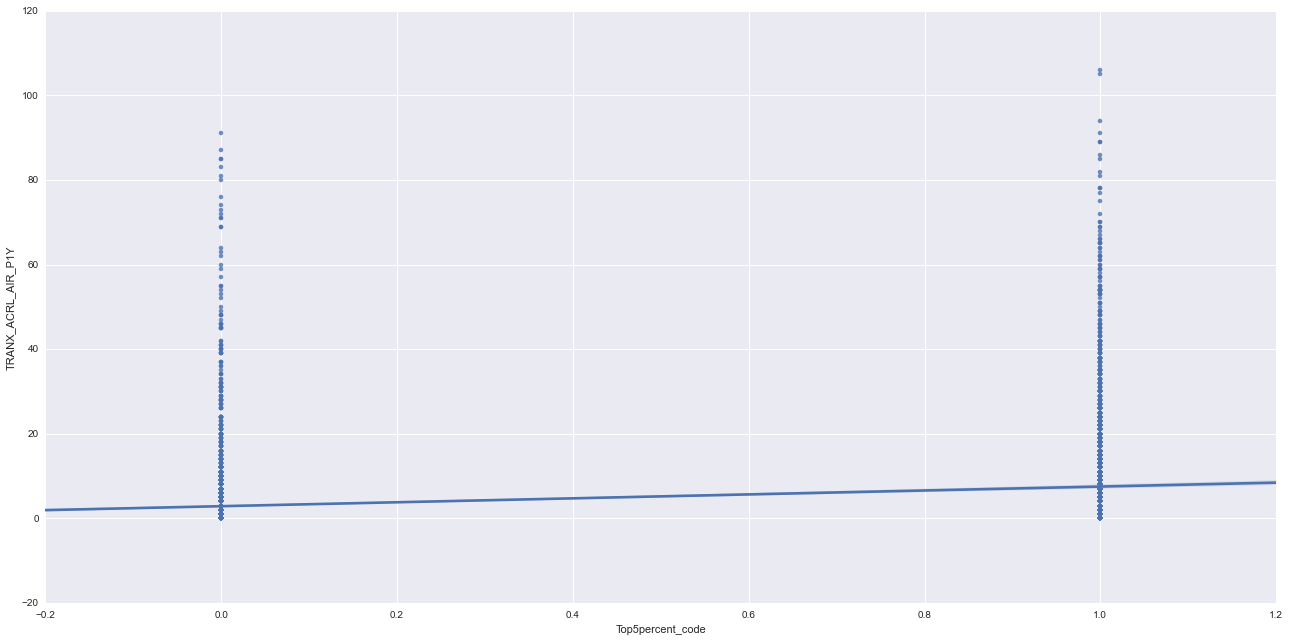

In [72]:
sns.lmplot("Top5percent_code", "TRANX_ACRL_AIR_P1Y", df, size=9, aspect=2)
# number of transaction by air-earn is not very obvious

In [73]:
df.groupby(['Air_Accrual_P12M','Top5percent']).count().max(1).unstack().div(df.groupby(['Air_Accrual_P12M']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# air earn is more likle to be top 5 percent

In [76]:
# participate in non-air earn is more likely to be top 5 percent
df.groupby(['Non_Air_Accrual_P12M','Top5percent']).count().max(1).unstack().div(df.groupby(['Non_Air_Accrual_P12M']).count().max(1).tolist(),axis=0).iplot(kind='bar')

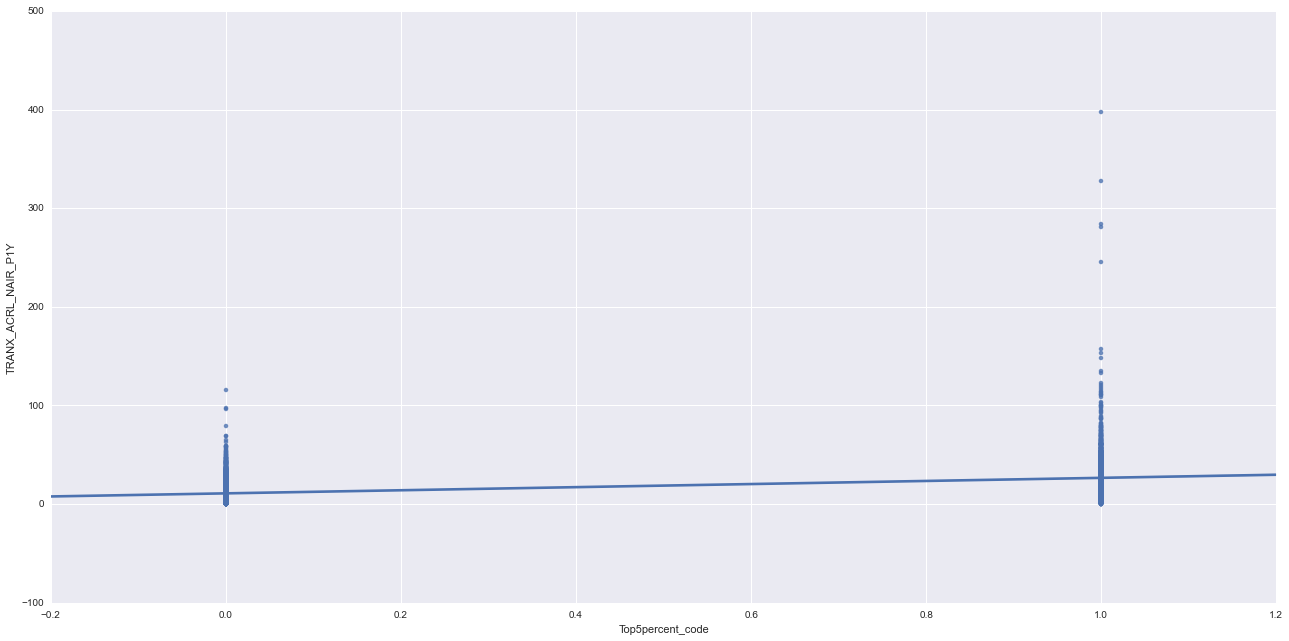

In [74]:
sns.lmplot("Top5percent_code", "TRANX_ACRL_NAIR_P1Y", df, size=9, aspect=2)
# number of transaction by non-air-earn is not very obvious

In [75]:
df.groupby(['Redemption_P12M','Top5percent']).count().max(1).unstack().div(df.groupby(['Redemption_P12M']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# air plus non-air redemption is most likely to be top 5 percent

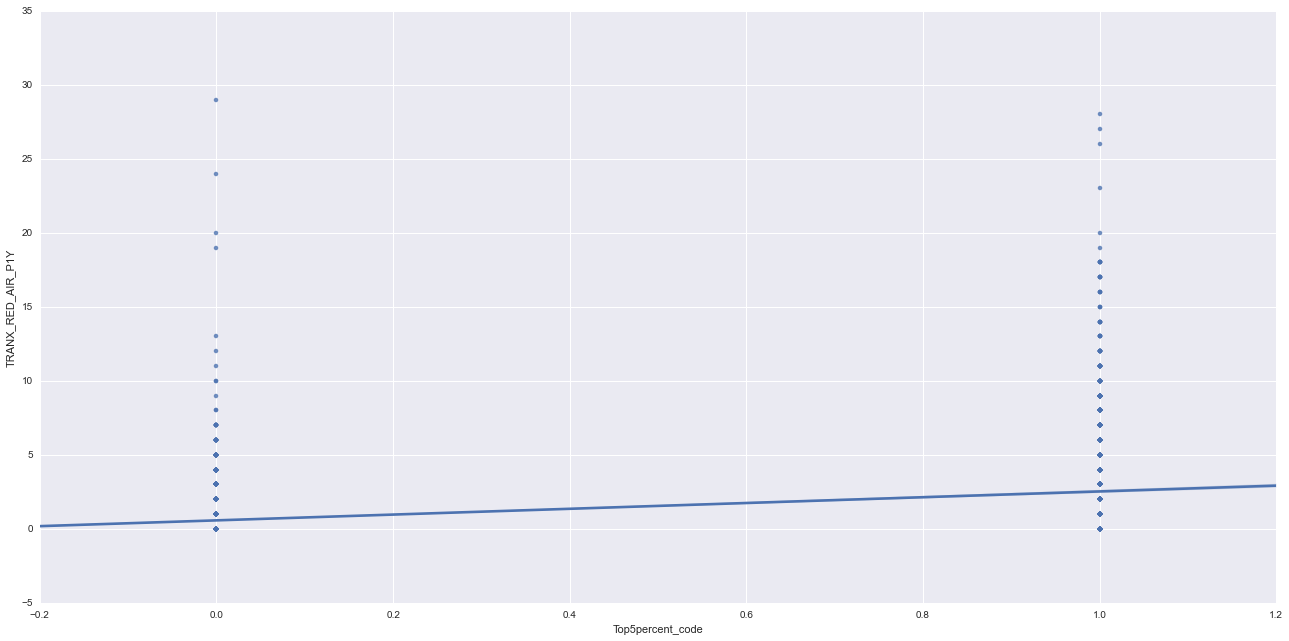

In [77]:
sns.lmplot("Top5percent_code", "TRANX_RED_AIR_P1Y", df, size=9, aspect=2)
# number of transaction by air redemption increase liklihood of top 5 percent

In [74]:
df.groupby(['Air_Redemption_P12M','Top5percent']).count().max(1).unstack().div(df.groupby(['Air_Redemption_P12M']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# non-air redemption is more likely to be top 5 percent

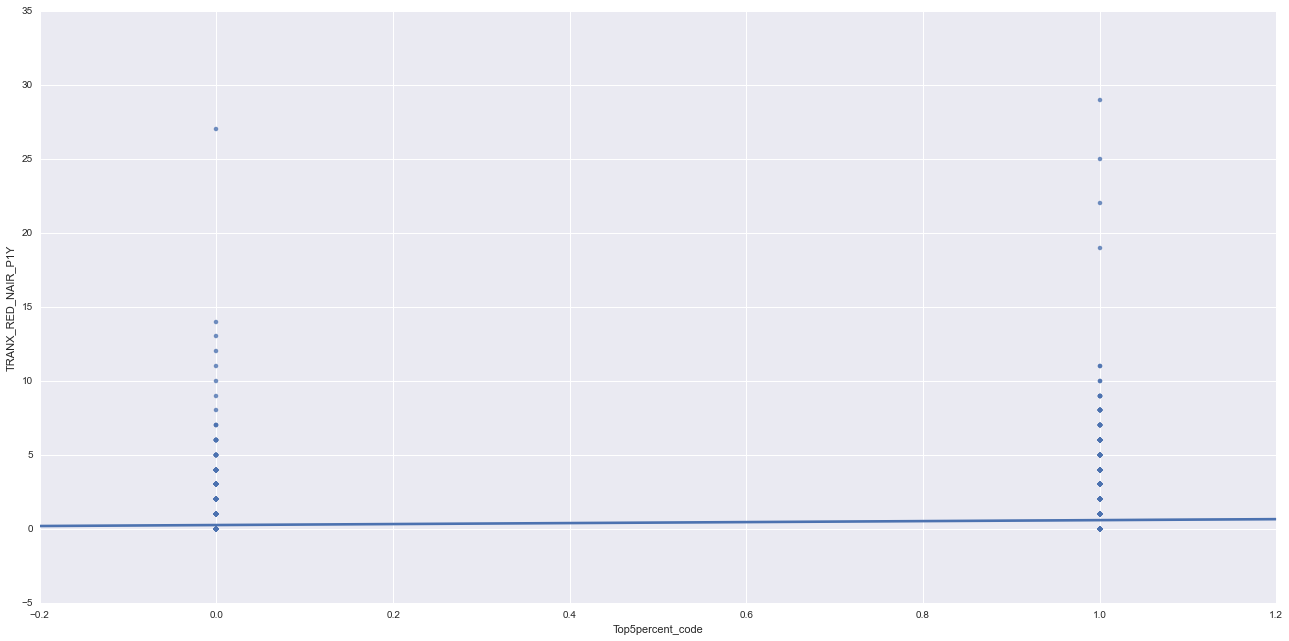

In [79]:
sns.lmplot("Top5percent_code", "TRANX_RED_NAIR_P1Y", df, size=9, aspect=2)
# NO DIFFERENCE

In [77]:
df.groupby(['Non_Air_Redemption_P12M','Top5percent']).count().max(1).unstack().div(df.groupby(['Non_Air_Redemption_P12M']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# THERE IS difference - but not less that as the other status

In [78]:
df.groupby(['At_Risk_MPO_Green','Top5percent']).count().max(1).unstack().div(df.groupby(['At_Risk_MPO_Green']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# no difference

In [79]:
df.groupby(['Download_AML_App','Top5percent']).count().max(1).unstack().div(df.groupby(['Download_AML_App']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# not too obviuous differenc

In [80]:
df.groupby(['F_USD1_Renewal','Top5percent']).count().max(1).unstack().div(df.groupby(['F_USD1_Renewal']).count().max(1).tolist(),axis=0).iplot(kind='bar')
# too small base for have used USD 1 to renew

# PRE-PROCESSING THE DATA
# Dummy variable + Standarizing

In [81]:
import pandas as pd
import seaborn as sns

In [82]:
# I pick all the variables from ECA where the difference across top 5 % is roughly > 5%

In [83]:
# Pre-processing:
# 1. Get dummy variable for binary - and drop 1 of them as baseline
# 2. Normalise all the metric variable

In [84]:
# Get dummy variable for martial status and then drop other as the baseline
df_martial = pd.get_dummies(df.Martial_Status)
df_martial = df_martial.drop(['Other'], axis=1)

In [85]:
# Get dummy variable for number of household member and then drop prefer not to disclose as the baseline
df_hh = pd.get_dummies(df.HH_Member)
df_hh = df_hh.drop(['I prefer not to disclose'], axis=1)

In [86]:
# Get dummy variable for occupation and then drop not working as the baseline
df_occ = pd.get_dummies(df.Occupation)
df_occ = df_occ.drop(['Not working'], axis=1)

In [87]:
# Get dummy variable for hh income and then drop refusal as the baseline
df_hh_income = pd.get_dummies(df.Monthly_Household_Income)
df_hh_income = df_hh_income.drop(['I prefer not to answer'], axis=1)

In [88]:
# Get dummy variable for gender and then drop female as the baseline
df_gender = pd.get_dummies(df.Gender)
df_gender = df_gender.drop(['Female'], axis=1)

In [89]:
# Get dummy variable for tier and then drop pure AM as the baseline
df_tier = pd.get_dummies(df.MPO_Tier)
df_tier = df_tier.drop(['AM'], axis=1)

In [90]:
# Get dummy variable for ownership of credit card ownership and then drop pure AM as the baseline
df_con = pd.get_dummies(df.Any_Conversion_Card)
df_con = df_con.drop(['Do not have any credit card'], axis=1)

In [91]:
# filter out those variables that are found to be vary across top 5 vs non top 5
cols = ['Speak_English', 'Speak_Cantonese', 'Hobbies_Arts_Festival', 'Hobbies_Music_Concert', 'Hobbies_Indoor_Sports', 'Hobbies_Sports_Events', 'Hobbies_Driving', 'Hobbies_Adventures', 'Hobbies_Online_Games', 'Hobbies_Spa', 'Hobbies_Technology', 'Hobbies_Travelling', 'Hobbies_Dining_out', 'Hobbies_Enjoy_Wine', 'Hobbies_Time_Pets', 'Spending_Proportion_Credit_Card', 'FFP_Imnotamemberofanyfrequentflyerclubsorprogrammes', 'Children_12_17', 'Chilrdren_18_or_above', 'Children_None', 'Follow_Twitter', 'Follow_Weibo', 'Follow_WeChat', 'No_of_Card', 'Age_Import', 'Direct_Earn_Card_AMEXCXCard', 'Tenure_AML', 'TRANX_ACRL_AIR_P1Y', 'TRANX_ACRL_NAIR_P1Y', 'TRANX_RED_AIR_P1Y', 'TRANX_RED_NAIR_P1Y']
df_f = df[cols]
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7648
Data columns (total 31 columns):
Speak_English                                          7649 non-null int64
Speak_Cantonese                                        7649 non-null int64
Hobbies_Arts_Festival                                  7649 non-null int64
Hobbies_Music_Concert                                  7649 non-null int64
Hobbies_Indoor_Sports                                  7649 non-null int64
Hobbies_Sports_Events                                  7649 non-null int64
Hobbies_Driving                                        7649 non-null int64
Hobbies_Adventures                                     7649 non-null int64
Hobbies_Online_Games                                   7649 non-null int64
Hobbies_Spa                                            7649 non-null int64
Hobbies_Technology                                     7649 non-null int64
Hobbies_Travelling                                     7649 non-null

In [92]:
df_f.describe()

Speak_English  Speak_Cantonese  Hobbies_Arts_Festival  \
count    7649.000000      7649.000000            7649.000000   
mean        0.320826         0.830697               0.277683   
std         0.466825         0.375044               0.447886   
min         0.000000         0.000000               0.000000   
25%         0.000000         1.000000               0.000000   
50%         0.000000         1.000000               0.000000   
75%         1.000000         1.000000               1.000000   
max         1.000000         1.000000               1.000000   

       Hobbies_Music_Concert  Hobbies_Indoor_Sports  Hobbies_Sports_Events  \
count            7649.000000             7649.00000            7649.000000   
mean                0.426069                0.31795               0.184730   
std                 0.494536                0.46571               0.388104   
min                 0.000000                0.00000               0.000000   
25%                 0.000000                0.00000               0.000000   
50%                 0.000000                0.00000               0.000000   
75%                 1.000000                1.00000               0.000000   
max                 1.000000                1.00000               1.000000   

       Hobbies_Driving  Hobbies_Adventures  Hobbies_Online_Games  Hobbies_Spa  \
count      7649.000000         7649.000000           7649.000000  7649.000000   
mean          0.289973            0.252582              0.153353     0.437704   
std           0.453779            0.434522              0.360351     0.496136   
min           0.000000            0.000000              0.000000     0.000000   
25%           0.000000            0.000000              0.000000     0.000000   
50%           0.000000            0.000000              0.000000     0.000000   
75%           1.000000            1.000000              0.000000     1.000000   
max           1.000000            1.000000              1.000000     1.000000   

              ...          Follow_Weibo  Follow_WeChat   No_of_Card  \
count         ...           7649.000000    7649.000000  7649.000000   
mean          ...              0.007060       0.039744     5.971761   
std           ...              0.083731       0.195369     3.685213   
min           ...              0.000000       0.000000     0.000000   
25%           ...              0.000000       0.000000     3.000000   
50%           ...              0.000000       0.000000     5.000000   
75%           ...              0.000000       0.000000     8.000000   
max           ...              1.000000       1.000000    36.000000   

        Age_Import  Direct_Earn_Card_AMEXCXCard   Tenure_AML  \
count  7649.000000                  7649.000000  7649.000000   
mean     40.848608                     0.719571     8.751602   
std      10.550106                     0.449238     5.257094   
min      18.000000                     0.000000     0.000000   
25%      33.000000                     0.000000     4.000000   
50%      39.000000                     1.000000     8.000000   
75%      48.000000                     1.000000    14.000000   
max      86.000000                     1.000000    17.000000   

       TRANX_ACRL_AIR_P1Y  TRANX_ACRL_NAIR_P1Y  TRANX_RED_AIR_P1Y  \
count         7649.000000          7649.000000        7649.000000   
mean             4.687933            17.153092           1.345535   
std             10.073475            16.997107           2.235183   
min              0.000000             0.000000           0.000000   
25%              0.000000             5.000000           0.000000   
50%              2.000000            14.000000           0.000000   
75%              4.000000            25.000000           2.000000   
max            106.000000           397.000000          29.000000   

       TRANX_RED_NAIR_P1Y  
count         7649.000000  
mean             0.384102  
std              1.229620  
min              0.000000  
25%              0

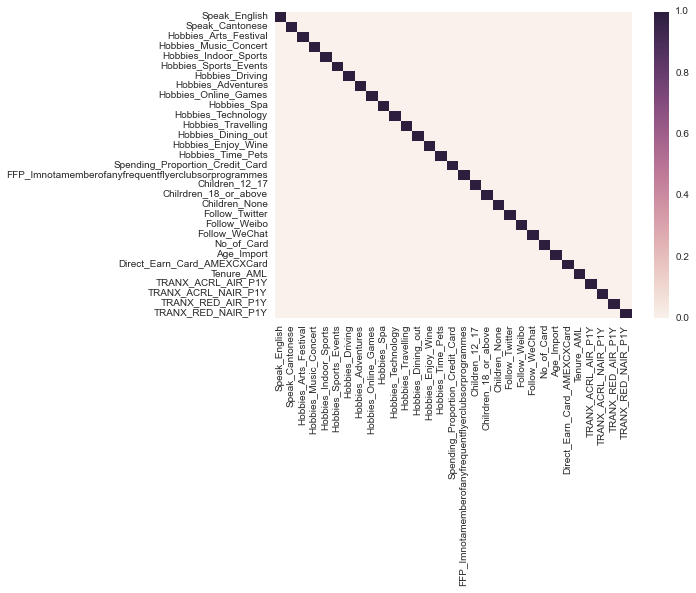

In [93]:
sns.heatmap(df_f.corr()>0.6);
# no overlapping of variables

In [94]:
# Standardizing variable
df_f['Age_Import'] = (df_f['Age_Import'] - df_f['Age_Import'].mean()) / df_f['Age_Import'].std()
df_f['Tenure_AML'] = (df_f['Tenure_AML'] - df_f['Tenure_AML'].mean()) / df_f['Tenure_AML'].std()
df_f['TRANX_ACRL_AIR_P1Y'] = (df_f['TRANX_ACRL_AIR_P1Y'] - df_f['TRANX_ACRL_AIR_P1Y'].mean()) / df_f['TRANX_ACRL_AIR_P1Y'].std()
df_f['TRANX_ACRL_NAIR_P1Y'] = (df_f['TRANX_ACRL_NAIR_P1Y'] - df_f['TRANX_ACRL_NAIR_P1Y'].mean()) / df_f['TRANX_ACRL_NAIR_P1Y'].std()
df_f['TRANX_RED_AIR_P1Y'] = (df_f['TRANX_RED_AIR_P1Y'] - df_f['TRANX_RED_AIR_P1Y'].mean()) / df_f['TRANX_RED_AIR_P1Y'].std()
df_f['TRANX_RED_NAIR_P1Y'] = (df_f['TRANX_RED_NAIR_P1Y'] - df_f['TRANX_RED_NAIR_P1Y'].mean()) / df_f['TRANX_RED_NAIR_P1Y'].std()
df_f['Spending_Proportion_Credit_Card'] = (df_f['Spending_Proportion_Credit_Card'] - df_f['Spending_Proportion_Credit_Card'].mean()) / df_f['Spending_Proportion_Credit_Card'].std()

/home/vagrant/.anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/vagrant/.anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/vagrant/.anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.or

In [95]:
df_f = pd.concat([df_f, df_martial, df_occ, df_hh_income, df_gender, df_tier, df_con], axis=1)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7648
Data columns (total 56 columns):
Speak_English                                                                                           7649 non-null int64
Speak_Cantonese                                                                                         7649 non-null int64
Hobbies_Arts_Festival                                                                                   7649 non-null int64
Hobbies_Music_Concert                                                                                   7649 non-null int64
Hobbies_Indoor_Sports                                                                                   7649 non-null int64
Hobbies_Sports_Events                                                                                   7649 non-null int64
Hobbies_Driving                                                                                         7649 non-null int64
Hobbies_Adventures       

In [96]:
colsb = ['Top5percent']
df_a1 = df[colsb]
df_a = pd.concat([df_f, df_a1], axis=1)
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7648
Data columns (total 57 columns):
Speak_English                                                                                           7649 non-null int64
Speak_Cantonese                                                                                         7649 non-null int64
Hobbies_Arts_Festival                                                                                   7649 non-null int64
Hobbies_Music_Concert                                                                                   7649 non-null int64
Hobbies_Indoor_Sports                                                                                   7649 non-null int64
Hobbies_Sports_Events                                                                                   7649 non-null int64
Hobbies_Driving                                                                                         7649 non-null int64
Hobbies_Adventures       

In [97]:
colsc = ['Top5percent_code']
df_a2 = df[colsc]
df_b = pd.concat([df_f, df_a2], axis=1)
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7648
Data columns (total 57 columns):
Speak_English                                                                                           7649 non-null int64
Speak_Cantonese                                                                                         7649 non-null int64
Hobbies_Arts_Festival                                                                                   7649 non-null int64
Hobbies_Music_Concert                                                                                   7649 non-null int64
Hobbies_Indoor_Sports                                                                                   7649 non-null int64
Hobbies_Sports_Events                                                                                   7649 non-null int64
Hobbies_Driving                                                                                         7649 non-null int64
Hobbies_Adventures       

# Running KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

# knn features and target

target = df.Top5percent

knn = KNeighborsClassifier()
scores = cross_val_score(knn, df_f, target)
# train model of knn for us (fit)
# design matrix feature <> target
# cross_val - k-fold

print("Accuracy: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std() * 2))

Accuracy: 0.77 +/- 0.04


In [99]:
k_scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform') #weighting - equal vote
    scores = cross_val_score(knn, df_f, target)
    
    k_scores.append((k, 'uniform', scores.mean(), scores.std()))
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, df_f, target)
    
    k_scores.append((k, 'distance', scores.mean(), scores.std()))

In [100]:
def plot_knn_scores(scores):
    columns = ['k','metric','score','std']
    df = pd.DataFrame(k_scores, columns=columns)
    dfx = df[columns[:3]].groupby(columns[:2]).mean().unstack()
#     dfx.columns = dfx.columns.droplevel()
    title = '<b>KNN Scores</b><br>K range from {} to {}'.format(
        dfx.index.min(),dfx.index.max())

    dfx.iplot(title=title,xTitle='K Neighbours',yTitle='Accuracy')

In [101]:
plot_knn_scores(k_scores)

In [102]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from collections import defaultdict
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_f, target, test_size=0.4, random_state=123)

In [223]:
#n_neighbors = range(1,3000,50)
# We got around 3,000 top 5 percent - going to 3,000 - must have mixed with top 5 and non-top 5

In [224]:
#scores = []
#for n in n_neighbors:
    clf = KNN(n)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))

In [225]:
#import matplotlib.pyplot as plt

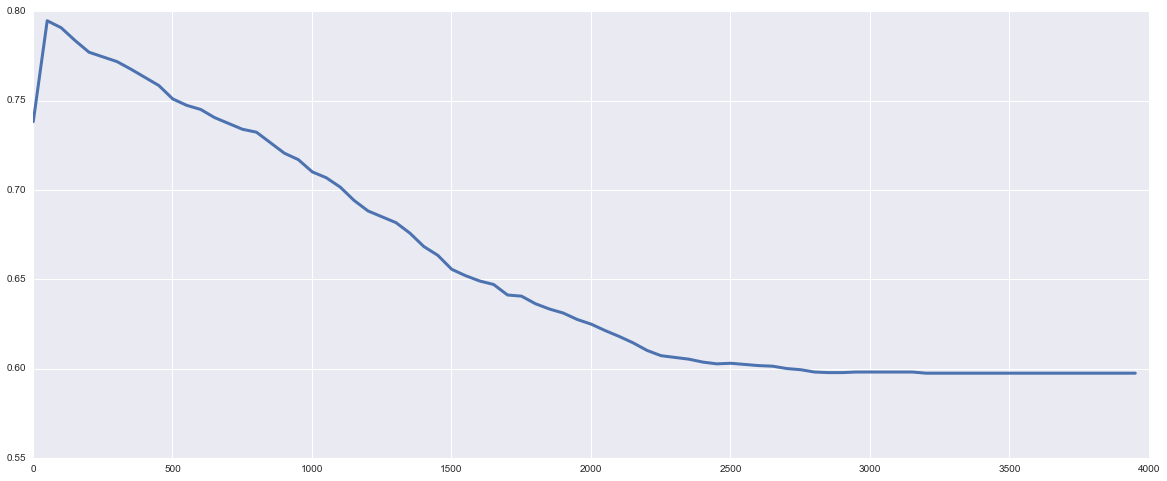

In [134]:
#plt.figure(figsize=(20,8))
#plt.plot(n_neighbors, scores, linewidth=3.0);
# peak within 50 - so fine tune within 50

In [104]:
n_neighbors_1 = range(1,100,2)
# peak within 50 - so fine tune within 50

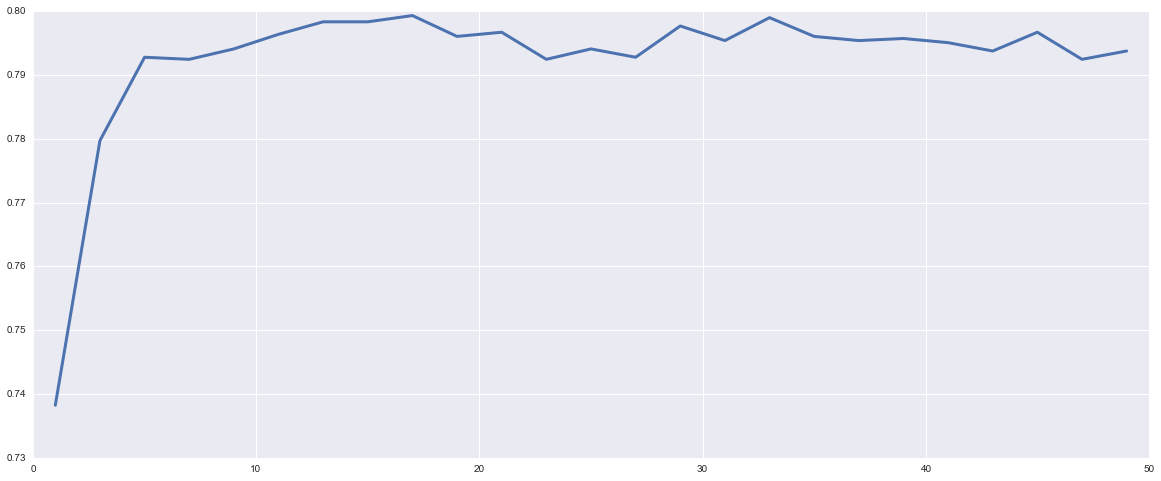

In [227]:
scores = []
for n in n_neighbors_1:
    clf = KNN(n)
    clf.fit(x_train, y_train)
    scores.append(clf.score(x_test, y_test))
    
plt.figure(figsize=(20,8))
plt.plot(n_neighbors_1, scores, linewidth=3.0);

In [105]:
# Or by using the built-in method from SciKit-Learn
from collections import defaultdict
scores = defaultdict(list)

# run 50 times to get rid of potenail sampling issue
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(df_f, target, test_size=0.30)
    for k in n_neighbors_1:
        clf = KNN(k)
        clf.fit(X_train, y_train)
        scores[k].append(clf.score(X_test, y_test))

scores = [np.mean(scores[k]) for k in scores]
    
print 'Best valuez for K is', np.argmax(scores) * 2 + 1

Best valuez for K is 27


In [106]:
from matplotlib.colors import ListedColormap
from sklearn import feature_selection
from sklearn.neighbors import KNeighborsClassifier as KNN
# Let's figure out what our most powerful features are.

F = feature_selection.f_classif(df_f, target)[0]

df_f_F_score = list(zip(df_f.columns,F))

df_f_F_scores = pd.DataFrame(df_f_F_score, columns=['Var','Score'])
df_f_F_scores.sort(['Score'], ascending=[0])

Var        Score
28                                TRANX_ACRL_NAIR_P1Y  1971.543131
29                                  TRANX_RED_AIR_P1Y  1717.684312
52                                                 GR  1557.696918
26                                         Tenure_AML  1137.244866
25                        Direct_Earn_Card_AMEXCXCard   976.214513
16  FFP_Imnotamemberofanyfrequentflyerclubsorprogr...   499.405814
27                                 TRANX_ACRL_AIR_P1Y   410.720358
15                    Spending_Proportion_Credit_Card   406.551841
24                                         Age_Import   384.108209
0                                       Speak_English   303.427407
53                                                 SL   242.514729
1                                     Speak_Cantonese   238.508123
23                                         No_of_Card   237.248244
51                                                 GO   235.256803
33  Higher management, senior admin, senior profes...   202.373380
36  Manual or blue collar worker (driver, technici...   201.859218
44                                HKD200,000 or above   161.118214
30                                 TRANX_RED_NAIR_P1Y   135.784057
41                                 HKD100,000-149,999   124.058179
6                                     Hobbies_Driving   121.234301
32                                             Single   120.825114
31                                            Married   107.835012
49                                               Male   104.777006
42                                 HKD150,000-199,999    99.587895
13                                 Hobbies_Enjoy_Wine    98.773736
9                                         Hobbies_Spa    91.502457
55                               Have conversion card    90.744929
18                              Chilrdren_18_or_above    86.454850
19                                      Children_None    84.642524
54                        Do not have conversion card    82.867933
46                                   HKD40,000-49,999    59.417082
43                                   HKD20,000-29,999    55.468132
8                                Hobbies_Online_Games    47.833307
5                               Hobbies_Sports_Events    41.114523
34  Junior to midlevel white collar (manager, prof...    40.176290
45                                   HKD30,000-39,999    38.777368
47                                   HKD50,000-69,999    37.192611
50                                                 DM    31.785460
7                                  Hobbies_Adventures    27.237687
11                                 Hobbies_Travelling    25.301629
12                                 Hobbies_Dining_out    25.055668
40                                   Below HKD 20,000    23.004499
2                               Hobbies_Arts_Festival    22.879172
17                                     Children_12_17    22.819553
10                                 Hobbies_Technology    19.038076
39  Small � medium business owner (with less than ...    18.821400
38           Self-employed / sole trader / consultant    18.808074
3                               Hobbies_Music_Concert    18.657746
4                               Hobbies_Indoor_Sports    17.005323
22                                      Follow_WeChat    13.010945
35   Large business owner (with 50 or more employees)     3.380046
37                                             Others     2.836035
20                                     Follow_Twitter     1.995519
48                                   HKD70,000-99,999     0.573687
21                                       Follow_Weibo     0.498849
14                                  Hobbies_Time_Pets     0.103421

In [107]:
sum(feature_selection.f_classif(df_f, target)[0] < 10)
# dig out those with F value < 10

6

In [108]:
select = (feature_selection.f_classif(df_f, target)[0] < 10)
df_f.columns[select]

Index([u'Hobbies_Time_Pets', u'Follow_Twitter', u'Follow_Weibo',
       u'Large business owner (with 50 or more employees)', u'Others',
       u'HKD70,000-99,999'],
      dtype='object')

In [109]:
post_select = df_f.columns.difference(df_f.columns[select])
df_f_new = df_f[post_select]
# filter out those with f value less than 10

In [110]:
# p value
sum(feature_selection.f_classif(df_f_new, target)[1] < 0.05)

50

In [111]:
# Sort the features based on their statistical significance 
ps = feature_selection.f_classif(df_f_new, target)[1]

p_score = zip(df_f_new.columns, ps)
ranked_p = sorted(p_score, key=lambda x:x[1])
# use a variable called x - start from first1 

df_f_p_value = pd.DataFrame(ranked_p, columns=['Variable','p-value'])
df_f_p_value

Variable        p-value
0                                 TRANX_ACRL_NAIR_P1Y   0.000000e+00
1                                   TRANX_RED_AIR_P1Y   0.000000e+00
2                                                  GR  3.044750e-310
3                                          Tenure_AML  1.506629e-232
4                         Direct_Earn_Card_AMEXCXCard  8.508141e-202
5   FFP_Imnotamemberofanyfrequentflyerclubsorprogr...  3.274147e-107
6                                  TRANX_ACRL_AIR_P1Y   5.386826e-89
7                     Spending_Proportion_Credit_Card   3.914623e-88
8                                          Age_Import   1.731263e-83
9                                       Speak_English   1.130122e-66
10                                                 SL   7.429486e-54
11                                    Speak_Cantonese   5.223126e-53
12                                         No_of_Card   9.646332e-53
13                                                 GO   2.544478e-52
14  Higher management, senior admin, senior profes...   2.393358e-45
15  Manual or blue collar worker (driver, technici...   3.078324e-45
16                                HKD200,000 or above   1.504273e-36
17                                 TRANX_RED_NAIR_P1Y   4.071625e-31
18                                 HKD100,000-149,999   1.356644e-28
19                                    Hobbies_Driving   5.505876e-28
20                                             Single   6.745387e-28
21                                            Married   4.286872e-25
22                                               Male   1.963914e-24
23                                 HKD150,000-199,999   2.604615e-23
24                                 Hobbies_Enjoy_Wine   3.908389e-23
25                                        Hobbies_Spa   1.470963e-21
26                               Have conversion card   2.147367e-21
27                              Chilrdren_18_or_above   1.832256e-20
28                                      Children_None   4.535463e-20
29                        Do not have conversion card   1.102152e-19
30                                   HKD40,000-49,999   1.436282e-14
31                                   HKD20,000-29,999   1.053641e-13
32                               Hobbies_Online_Games   5.014754e-12
33                              Hobbies_Sports_Events   1.520961e-10
34  Junior to midlevel white collar (manager, prof...   2.452115e-10
35                                   HKD30,000-39,999   5.001049e-10
36                                   HKD50,000-69,999   1.122219e-09
37                                                 DM   1.783073e-08
38                                 Hobbies_Adventures   1.846471e-07
39                                 Hobbies_Travelling   5.014560e-07
40                                 Hobbies_Dining_out   5.694286e-07
41                                   Below HKD 20,000   1.646808e-06
42                              Hobbies_Arts_Festival   1.757408e-06
43                                     Children_12_17   1.812607e-06
44                                 Hobbies_Technology   1.298191e-05
45  Small � medium business owner (with less than ...   1.453921e-05
46           Self-employed / sole trader / consultant   1.464089e-05
47                              Hobbies_Music_Concert   1.583871e-05
48                              Hobbies_Indoor_Sports   3.766971e-05
49                                      Follow_WeChat   3.116508e-04

# Random Forest

In [112]:
# Further refine by random forest

In [113]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, df_f_new, target)
print("Accuracy: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std() * 2))

Accuracy: 0.78 +/- 0.12


In [114]:
import random
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import metrics
from numpy import random
from IPython.display import display as dump

from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs # shapeless object - inside an n-dimensional subject -> nice decision boundary
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier # extra random tree -> end up being useless
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier # prepare for the classifer
from sklearn.ensemble import AdaBoostClassifier # general name for boosting

In [121]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_f, target, test_size=0.4, random_state=123)

In [115]:
## AdaBootClassifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)
scores = cross_val_score(clf, df_f_new, target)
print "AdaBootClassifier:", scores.mean(), scores.std()*2

AdaBootClassifier: 0.734610163668 0.0835473610567


In [116]:
#Extra Tree
scores = []
for j in range (1,10,2): #max_depth    
    for i in range(30,100,10): # min_size
        for k in range(5,30,5): # number of estiamtors
            df_Extra = ExtraTreesClassifier(n_estimators=k, max_depth=j, min_samples_split=i)
            #scores = cross_val_score(etclf, x, y)
            #print ("Max. depth: "+str(i),"Minimum split size: "+str(j),scores.mean())
            scores.append((k, j, i, cross_val_score(df_Extra, df_f_new, target).mean(), 2*cross_val_score(df_Extra, df_f_new, target).std()))
        
df_scores_extra = pd.DataFrame(scores, columns=['number of estimators','max_depth','mini_split_size','score','error of model'])
df_scores_extra['Net_score'] = df_scores_extra['score'] - df_scores_extra['error of model']
df_scores_extra.sort(['Net_score'], ascending=[0])

number of estimators  max_depth  mini_split_size     score  \
36                     10          3               30  0.775919   
50                      5          3               60  0.722715   
48                     20          3               50  0.747156   
66                     10          3               90  0.772517   
47                     15          3               50  0.735132   
54                     25          3               60  0.746500   
111                    10          7               40  0.798279   
52                     15          3               60  0.724801   
80                      5          5               50  0.774613   
64                     25          3               80  0.758143   
122                    15          7               60  0.789648   
67                     15          3               90  0.770166   
171                    10          9               90  0.795664   
132                    15          7               80  0.796055   
130                     5          7               80  0.770301   
6                      10          1               40  0.662697   
113                    20          7               40  0.796316   
136                    10          7               90  0.789520   
85                      5          5               60  0.769782   
140                     5          9               30  0.784420   
163                    20          9               70  0.795008   
112                    15          7               40  0.793573   
146                    10          9               40  0.797495   
87                     15          5               60  0.775660   
93                     20          5               70  0.789258   
39                     25          3               30  0.751597   
155                     5          9               60  0.789648   
126                    10          7               70  0.788736   
135                     5          7               90  0.768338   
75                      5          5               40  0.780627   
..                    ...        ...              ...       ...   
41                     10          3               40  0.718134   
43                     20          3               40  0.725977   
105                     5          7               30  0.778015   
29                     25          1               80  0.617334   
20                      5          1               70  0.606620   
3                      20          1               30  0.623870   
11                     10          1               50  0.653029   
90                      5          5               70  0.750562   
42                     15          3               40  0.705192   
23                     20          1               70  0.620210   
53                     20          3               60  0.718523   
5                       5          1               40  0.647931   
27                     15          1               80  0.626223   
56                     10          3               70  0.718785   
0                       5          1               30  0.609883   
63                     20          3               80  0.733697   
34                     25          1               90  0.604131   
10                      5          1               50  0.621392   
55                      5          3               70  0.693425   
8                      20          1               40  0.596027   
95                      5          5               80  0.758664   
61                     10          3               80  0.752387   
19                     25          1               60  0.614720   
15                      5          1               60  0.620863   
21                     10          1               70  0.609231   
37                     15          3               30  0.742190   
25                      5          1               80  0.615897   
12                     15          1               5

In [122]:
df_Extra.fit(x_train, y_train)
df_Extra.score(x_test, y_test)
print metrics.confusion_matrix(df_Extra.predict(x_test), y_test)

[[1606  298]
 [ 222  934]]


In [119]:
from sklearn.feature_selection import RFECV

class ExtraTreesClassifierWithCoef(ExtraTreesClassifier): # parents class
    def fit(self, *args, **kwargs): #override its fit function
        super(ExtraTreesClassifierWithCoef, self).fit(*args, **kwargs) #> X y
        self.coef_ = self.feature_importances_

et = ExtraTreesClassifierWithCoef(n_estimators=100, max_depth=3, min_samples_split=40, n_jobs=-1)
# choose the best model with the lowest error

etcv = RFECV(estimator=et, step=1, cv=10, verbose=2)

et_selector = etcv.fit(df_f_new, target)

print et_selector.n_features_

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

In [120]:
print zip(et_selector.support_, et_selector.ranking_)

[(True, 1), (False, 31), (False, 27), (False, 7), (False, 14), (False, 26), (True, 1), (False, 6), (True, 1), (False, 25), (True, 1), (True, 1), (False, 2), (False, 5), (False, 30), (True, 1), (False, 21), (False, 15), (False, 12), (False, 9), (True, 1), (False, 17), (False, 33), (False, 19), (True, 1), (False, 16), (False, 23), (False, 20), (False, 22), (False, 11), (False, 18), (False, 24), (False, 28), (False, 13), (False, 8), (True, 1), (False, 4), (False, 3), (True, 1), (False, 32), (True, 1), (False, 29), (True, 1), (True, 1), (True, 1), (True, 1), (True, 1), (True, 1), (False, 10), (True, 1)]


In [123]:
# addition of number of estimator as another variable for random forest
scores = []
for j in range (1,10,2): #max_depth    
    for i in range(30,100,10): # min_size
        for k in range(5,30,5): # number of estiamtors
            df_Random = RandomForestClassifier(n_estimators=k, max_depth=j, min_samples_split=i)
            scores.append((k, j, i, cross_val_score(df_Random, df_f_new, target).mean(), 2*cross_val_score(df_Random, df_f_new, target).std()))
        
df_scores_random = pd.DataFrame(scores, columns=['number of estimators','max_depth','mini_split_size','score', 'error of model'])
df_scores_random['Net_score'] = df_scores_random['score'] - df_scores_random['error of model']
df_scores_random.sort(['Net_score'], ascending=[0])

number of estimators  max_depth  mini_split_size     score  \
40                      5          3               40  0.813313   
70                      5          5               30  0.787948   
38                     20          3               30  0.794878   
50                      5          3               60  0.782065   
66                     10          3               90  0.787032   
61                     10          3               80  0.770823   
55                      5          3               70  0.784024   
48                     20          3               50  0.778536   
121                    10          7               60  0.801153   
102                    15          5               90  0.809779   
35                      5          3               30  0.754482   
130                     5          7               80  0.784812   
79                     25          5               40  0.800237   
119                    25          7               50  0.803115   
44                     25          3               40  0.790561   
51                     10          3               60  0.743761   
100                     5          5               90  0.786116   
96                     10          5               80  0.799844   
99                     25          5               80  0.796969   
72                     15          5               30  0.801283   
59                     25          3               70  0.779974   
30                      5          1               90  0.751077   
60                      5          3               80  0.794743   
58                     20          3               70  0.797493   
36                     10          3               30  0.784546   
120                     5          7               60  0.794092   
32                     15          1               90  0.759050   
37                     15          3               30  0.771869   
84                     25          5               50  0.796315   
77                     15          5               40  0.788212   
..                    ...        ...              ...       ...   
90                      5          5               70  0.775661   
53                     20          3               60  0.783895   
26                     10          1               80  0.701139   
136                    10          7               90  0.792393   
155                     5          9               60  0.784553   
78                     20          5               40  0.790956   
22                     15          1               70  0.719037   
94                     25          5               70  0.787426   
67                     15          3               90  0.762319   
4                      25          1               30  0.657868   
29                     25          1               80  0.712374   
31                     10          1               90  0.757746   
15                      5          1               60  0.670673   
11                     10          1               50  0.724542   
9                      25          1               40  0.718264   
45                      5          3               50  0.760233   
18                     20          1               60  0.734601   
46                     10          3               50  0.765202   
33                     20          1               90  0.720740   
19                     25          1               60  0.694855   
24                     25          1               70  0.698005   
20                      5          1               70  0.687926   
12                     15          1               50  0.691983   
13                     20          1               50  0.672898   
14                     25          1               50  0.715901   
23                     20          1               70  0.660740   
0                       5          1               30  0.712639   
25                      5          1               8

In [124]:
df_Random.fit(x_train, y_train)
df_Random.score(x_test, y_test)
print metrics.confusion_matrix(df_Random.predict(x_test), y_test)

[[1621  298]
 [ 207  934]]


In [125]:
from sklearn.feature_selection import RFECV

class RandomForestClassifierWithCoef(RandomForestClassifier): # parents class
    def fit(self, *args, **kwargs): #override its fit function
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs) #> X y
        self.coef_ = self.feature_importances_

rf = RandomForestClassifierWithCoef(n_estimators=100, max_depth=3, min_samples_split=40, n_jobs=-1)
# choose the best model

rfcv = RFECV(estimator=et, step=1, cv=10, verbose=2)

rf_selector = rfcv.fit(df_f_new, target)

print rf_selector.n_features_

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

In [126]:
print zip(rf_selector.support_, rf_selector.ranking_)

[(False, 2), (False, 34), (False, 32), (False, 13), (False, 17), (False, 27), (True, 1), (False, 18), (True, 1), (False, 29), (True, 1), (True, 1), (False, 7), (False, 11), (False, 25), (False, 6), (False, 33), (False, 15), (False, 23), (False, 14), (False, 3), (False, 35), (False, 36), (False, 21), (False, 8), (False, 19), (False, 38), (False, 39), (False, 22), (False, 26), (False, 24), (False, 28), (False, 20), (False, 16), (False, 12), (False, 4), (False, 10), (False, 9), (True, 1), (False, 30), (False, 5), (False, 37), (True, 1), (True, 1), (True, 1), (True, 1), (True, 1), (True, 1), (False, 31), (True, 1)]


In [136]:
print rf_selector.__class__

<class 'sklearn.feature_selection.rfe.RFECV'>


In [130]:
dir(rf_selector)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_get_param_names',
 '_get_support_mask',
 'cv',
 'decision_function',
 'estimator',
 'estimator_',
 'estimator_params',
 'fit',
 'fit_transform',
 'get_params',
 'get_support',
 'grid_scores_',
 'inverse_transform',
 'n_features_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'ranking_',
 'score',
 'scoring',
 'set_params',
 'step',
 'support_',
 'transform',
 'verbose']

In [138]:
print rf_selector.__abstractmethods__
print rf_selector.__class__
print rf_selector.__delattr__
print rf_selector.__dict__
print rf_selector.__doc__
print rf_selector.__format__
print rf_selector.__getattribute__
print rf_selector.__hash__
print rf_selector.__init__
print rf_selector.__module__
print rf_selector.__new__
print rf_selector.__reduce__
print rf_selector.__reduce_ex__
print rf_selector.__repr__
print rf_selector.__setattr__
print rf_selector.__sizeof__
print rf_selector.__str__
print rf_selector.__subclasshook__
print rf_selector.__weakref__
print rf_selector._abc_cache
print rf_selector._abc_negative_cache
print rf_selector._abc_negative_cache_version
print rf_selector._abc_registry
print rf_selector._get_param_names
print rf_selector._get_support_mask
print rf_selector.cv
print rf_selector.estimator
print rf_selector.estimator_
print rf_selector.estimator_params
print rf_selector.fit
print rf_selector.fit_transform
print rf_selector.get_params
print rf_selector.get_support
print rf_selector.grid_scores_
print rf_selector.inverse_transform
print rf_selector.n_features_
print rf_selector.predict
print rf_selector.predict_log_proba
print rf_selector.predict_proba
print rf_selector.ranking_
print rf_selector.score
print rf_selector.scoring
print rf_selector.set_params
print rf_selector.step
print rf_selector.support_
print rf_selector.transform
print rf_selector.verbose

frozenset([])
<class 'sklearn.feature_selection.rfe.RFECV'>
<method-wrapper '__delattr__' of RFECV object at 0x7f0ee00249d0>
{'scoring': None, 'n_features_': 12, 'verbose': 2, 'support_': array([False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True], dtype=bool), 'step': 1, 'estimator_params': None, 'estimator': ExtraTreesClassifierWithCoef(bootstrap=False, class_weight=None,
               criterion='gini', max_depth=3, max_features='auto',
               max_leaf_nodes=None, min_samples_leaf=1,
               min_samples_split=40, min_weight_fraction_leaf=0.0,
               n_estimators=100, n_jobs=-1, oob_score=False,
               random_state=None, verbos

In [180]:
df_f_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7648
Data columns (total 50 columns):
Age_Import                                                                                              7649 non-null float64
Below HKD 20,000                                                                                        7649 non-null float64
Children_12_17                                                                                          7649 non-null int64
Children_None                                                                                           7649 non-null int64
Chilrdren_18_or_above                                                                                   7649 non-null int64
DM                                                                                                      7649 non-null float64
Direct_Earn_Card_AMEXCXCard                                                                             7649 non-null int64
Do not have convers